In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.utils.data as Data
from torch.nn import init
import torch.optim as optim

from importlib import reload
import pytorch as pts

In [29]:
torch.manual_seed(1)
print(torch.__version__)
torch.set_default_tensor_type("torch.FloatTensor")

1.10.2


# Linear Regression

## Generate Data

In [30]:
num_inputs = 2
num_examples = 1000
true_w = np.array([[2, -3.4]])
true_b = 4.2
features = np.random.normal(0, 1, (num_examples, num_inputs))
labels = np.dot(features, true_w.T) + true_b 
labels += np.random.normal(0, 0.01, (num_examples, 1))
lables = labels.reshape(num_examples)

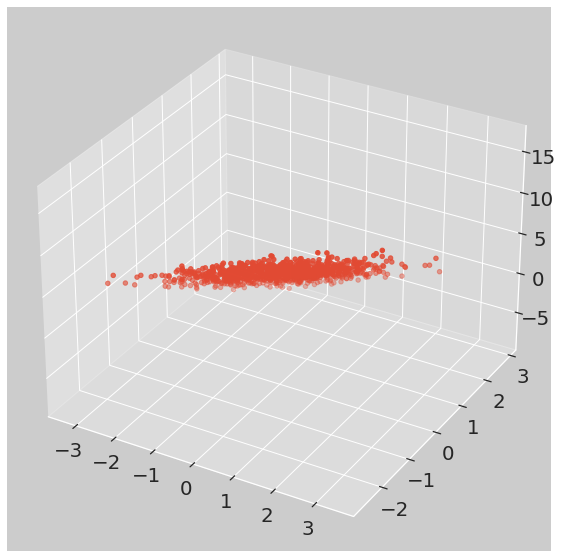

In [31]:
pts.ln3plot(features, labels)

## Read Data

In [32]:
features = torch.tensor(features, dtype=torch.float)
labels = torch.tensor(lables, dtype=torch.float)
data_iter = pts.pack_data(features, labels)

## Define Model

In [33]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

In [34]:
print(net, "\n") 
for name, param in net.named_parameters():
    print(name, "\t", param)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
) 

linear.weight 	 Parameter containing:
tensor([[-0.1455,  0.3597]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([0.0983], requires_grad=True)


In [35]:
## initial Models
init.normal_(net.linear.weight, mean=0.0, std=0.01)
init.constant_(net.linear.bias, val=0.0) 

Parameter containing:
tensor([0.], requires_grad=True)

## Loss Function

In [36]:
loss = nn.MSELoss()

## Optimization Algorithm

In [37]:
optimizer = optim.SGD(net.parameters(), lr=0.03)

# 为不同子网络设置不同的学习率
# optimizer =optim.SGD([
#                 # 如果对某个参数不指定学习率，就使用最外层的默认学习率
#                 {'params': net.subnet1.parameters()}, # lr=0.03
#                 {'params': net.subnet2.parameters(), 'lr': 0.01}
#             ], lr=0.03)
# # 调整学习率
# for param_group in optimizer.param_groups:
#     param_group['lr'] *= 0.1 # 学习率为之前的0.1倍
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Fit Model

In [38]:
## 使用缺省的训练模型
#pts.fit(net, data_iter)  ## 使用缺省的损失函数与优化器
pts.fit(net, data_iter, loss, optimizer, 4)

epoch 1, loss: 0.000103
epoch 2, loss: 0.000100
epoch 3, loss: 0.000055
epoch 4, loss: 0.000073


## The Results

In [39]:
dense = net.linear
print(true_w, "\t", dense.weight.data)
print(true_b, "\t", dense.bias.data)

[[ 2.  -3.4]] 	 tensor([[ 2.0001, -3.4002]])
4.2 	 tensor([4.1998])


# Multi-Layers Perceptron

## Define Model by derivated from nn.Module

In [40]:
class MLP(nn.Module):
    # 声明带有模型参数的层，这里声明了两个全连接层
    def __init__(self, **kwargs):
        # 调用MLP父类Block的构造函数来进行必要的初始化。这样在构造实例时还可以指定其他函数
        # 参数，如“模型参数的访问、初始化和共享”一节将介绍的模型参数params
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Linear(784, 256) # 隐藏层
        self.act = nn.ReLU()
        self.output = nn.Linear(256, 10)  # 输出层
         

    # 定义模型的前向计算，即如何根据输入x计算返回所需要的模型输出
    def forward(self, x):
        a = self.act(self.hidden(x))
        return self.output(a)

In [41]:
X = torch.rand(2, 784)
net = MLP()
print(net)
net(X)

MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


tensor([[ 0.0169, -0.0055,  0.0415,  0.1950, -0.1827, -0.0006, -0.0349, -0.0360,
          0.1374,  0.1110],
        [ 0.0794,  0.0263,  0.1388,  0.2346, -0.0545, -0.0949, -0.0166,  0.0536,
          0.1472, -0.0088]], grad_fn=<AddmmBackward0>)